In [1]:
import warnings
import ast
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

warnings.filterwarnings("ignore")

In [2]:
PROJECT_NAME = "hive"
EXP_ID = "apch"
MODEL_HISTORY = 15
TOTAL_WINDOWS = 19
ALPHA = 0.05

DATA_DIR = Path().cwd() / "ecoselekt" / "data"
MODELS_DIR = Path().cwd() / "ecoselekt" / "models"
RESULTS_DIR = Path().cwd() / "results" / f"exp_{EXP_ID}"
FIGURES_DIR = Path().cwd() / "figures"

DATA_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
# load baseline evaluation results
base_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_base_eval.csv")
base_eval_df["model"] = "base"
base_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,hive,0,1,0.832046,0.814745,0.823305,0.751672,0.632634,0.911930,0.491228,base
1,hive,0,2,0.889720,0.833625,0.860759,0.789707,0.672573,0.941516,0.542636,base
2,hive,0,3,0.934087,0.853701,0.892086,0.863854,0.776281,0.966412,0.705882,base
3,hive,0,4,0.813462,0.884937,0.847695,0.845221,0.705886,0.918858,0.563063,base
4,hive,0,5,0.810707,0.860041,0.834646,0.769640,0.669863,0.873115,0.521739,base


In [4]:
# load ecoselekt evaluation results
selekt_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selekt_eval.csv")
selekt_eval_df["model"] = "ecoselekt"
selekt_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,hive,15,16,0.674419,0.813084,0.737288,0.789921,0.667746,0.820640,0.548387,ecoselekt
1,hive,15,17,0.553719,0.881579,0.680203,0.808839,0.705454,0.686507,0.564516,ecoselekt
2,hive,15,18,0.584000,0.890244,0.705314,0.808857,0.705644,0.747450,0.559322,ecoselekt
3,hive,15,19,0.294964,0.891304,0.443243,0.749647,0.569307,0.510605,0.363636,ecoselekt
4,hive,16,17,0.563025,0.881579,0.687179,0.809476,0.715461,0.664016,0.580645,ecoselekt


In [5]:
# load best select evaluation results
best_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_eval.csv")
best_eval_df["model"] = "best"
best_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,hive,15,16,0.770492,0.878505,0.820961,0.864637,0.783587,0.884279,0.698925,best
1,hive,15,17,0.598214,0.881579,0.712766,0.876592,0.749434,0.795449,0.637097,best
2,hive,15,18,0.625000,0.914634,0.742574,0.871848,0.752219,0.828495,0.618644,best
3,hive,15,19,0.330645,0.891304,0.482353,0.840980,0.641035,0.663539,0.461039,best
4,hive,16,17,0.620370,0.881579,0.728261,0.881367,0.768173,0.804839,0.669355,best


(20, 11)


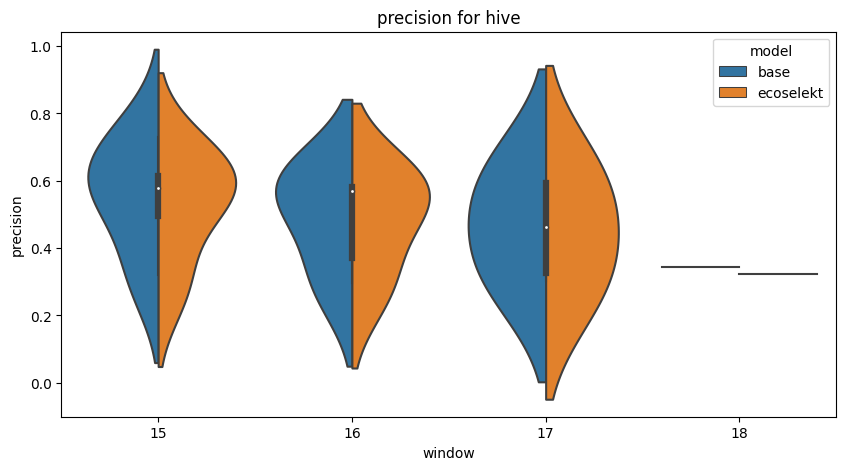

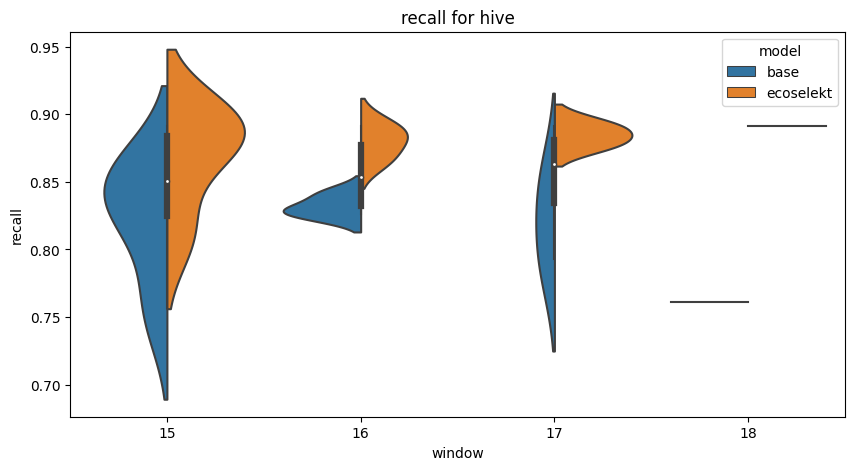

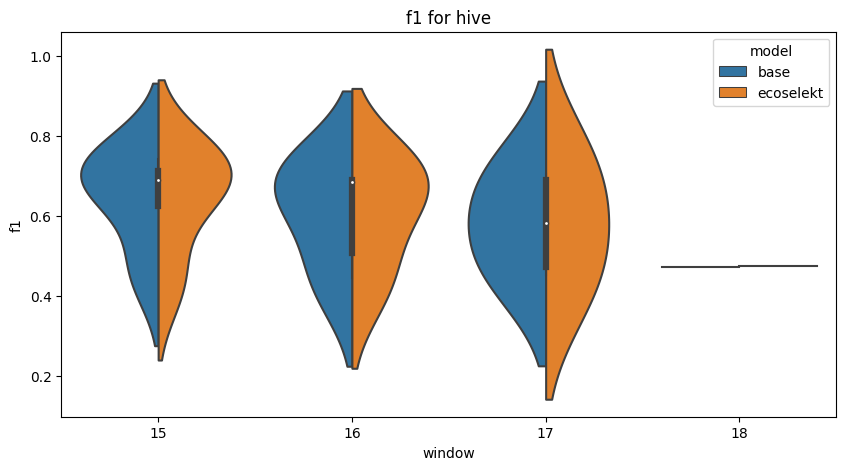

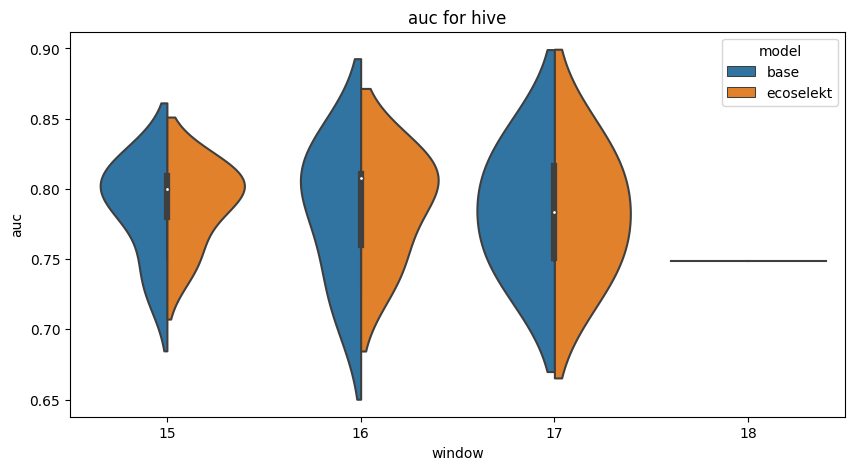

In [6]:
# concat base and ecoselekt evaluation dataframes keeping only common `window` and `test_split` then plot violin plots for each metric
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
print(eval_df.shape)

# plot violin plots for each metric
for metric in ["precision", "recall", "f1", "auc"]:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x="window", y=metric, data=eval_df, hue="model", split=True)
    plt.title(f"{metric} for {PROJECT_NAME}")
    plt.show()


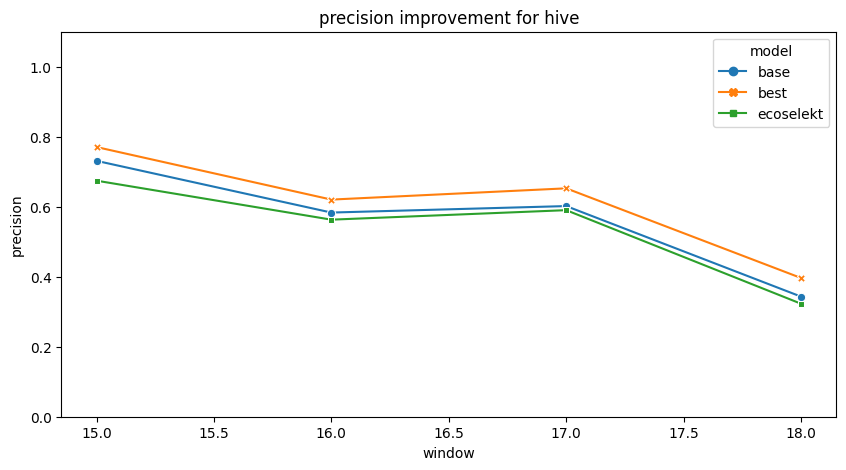

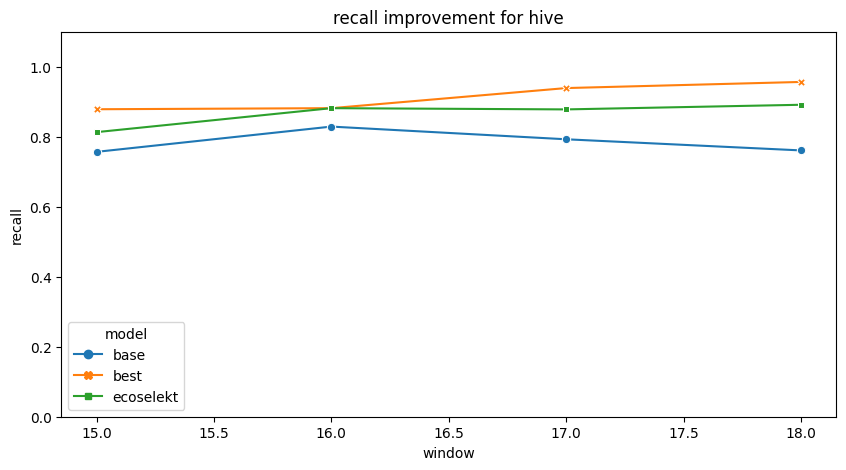

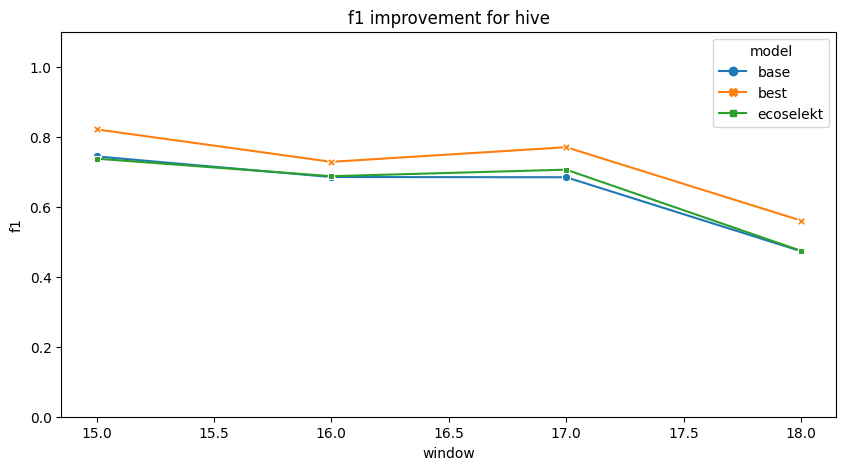

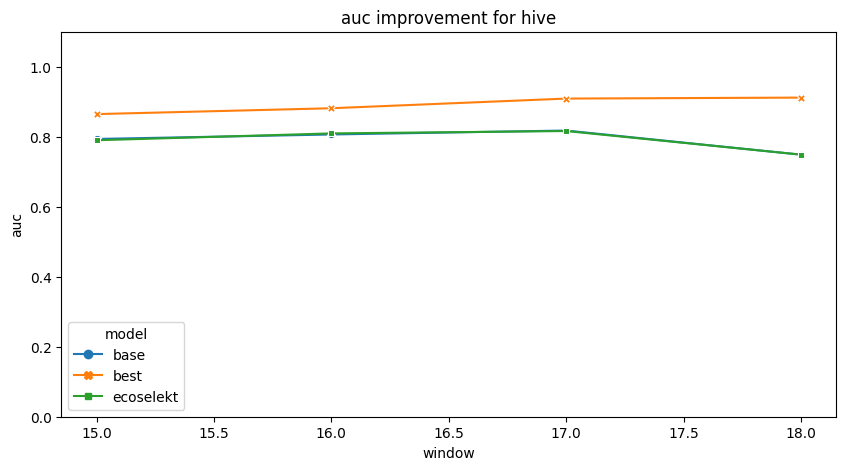

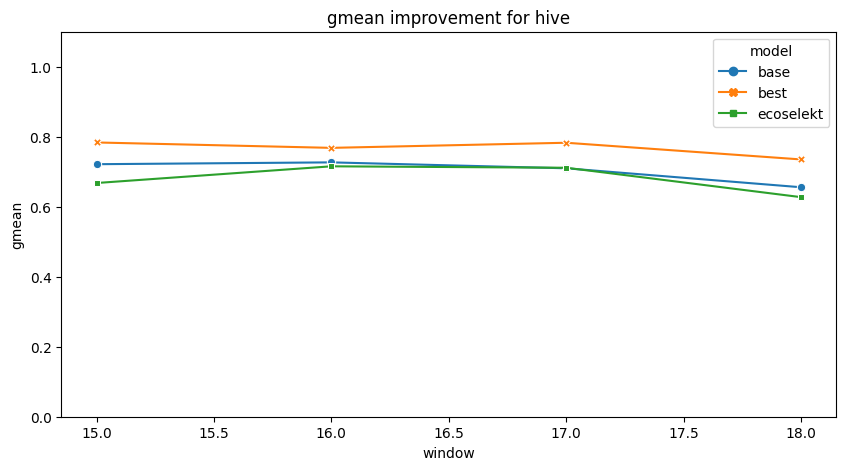

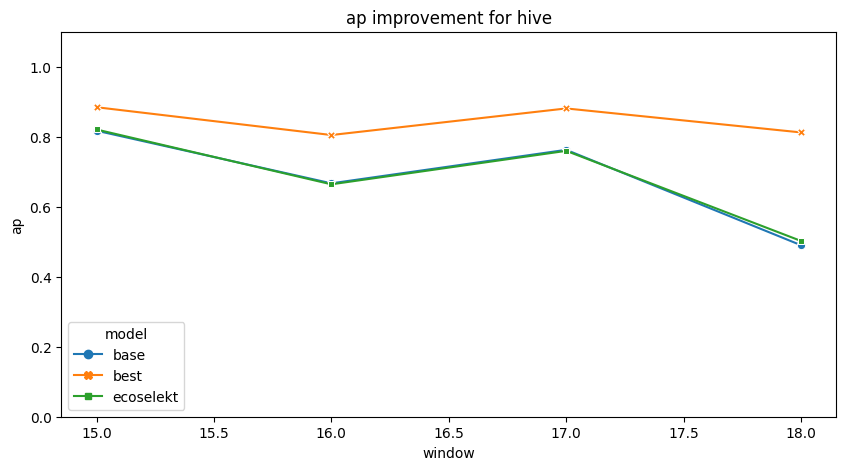

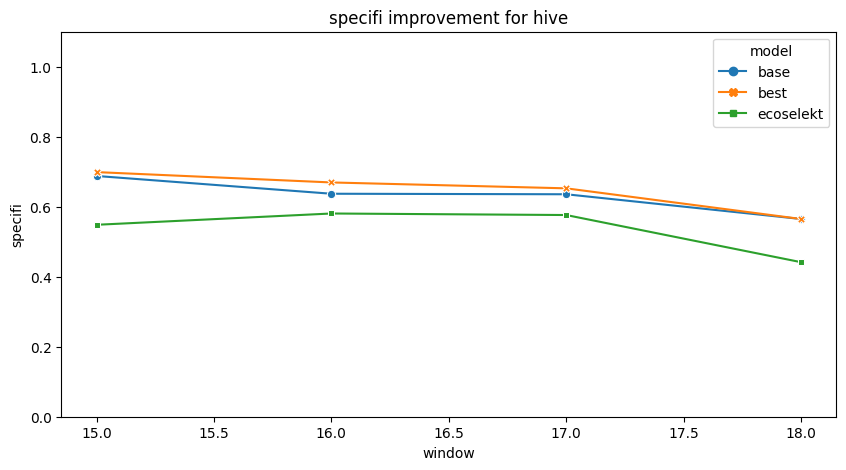

In [7]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

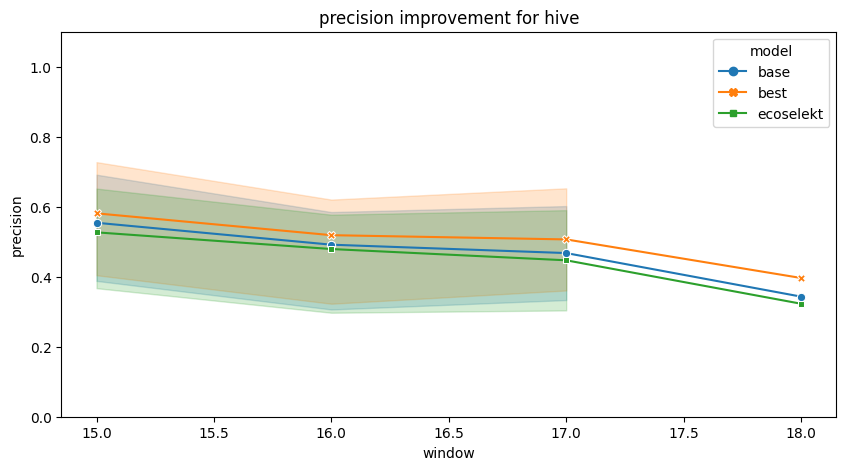

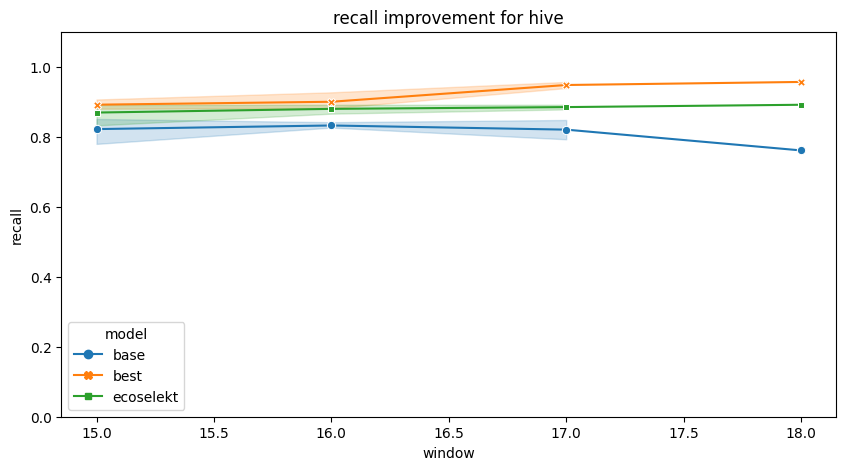

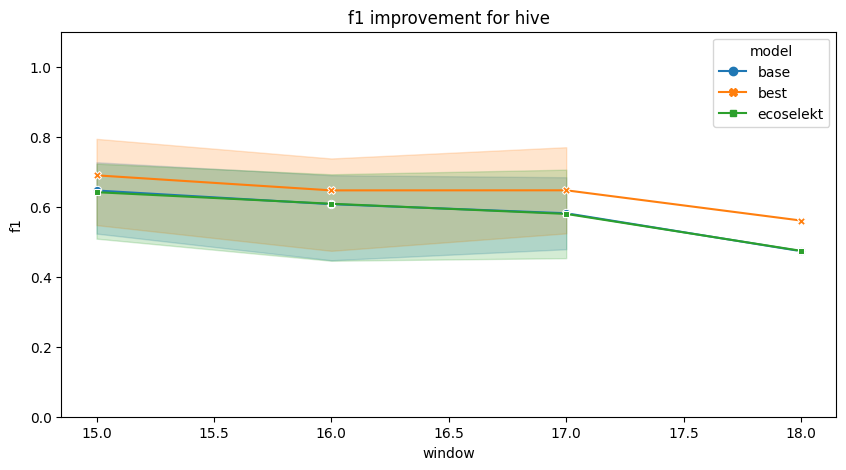

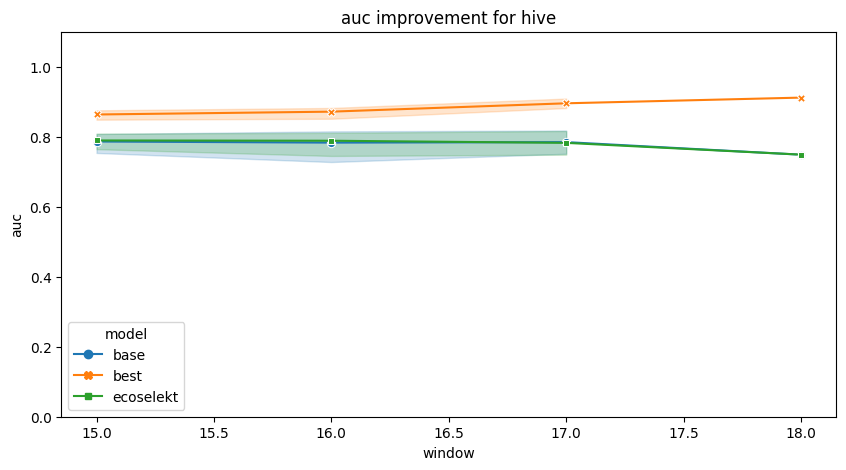

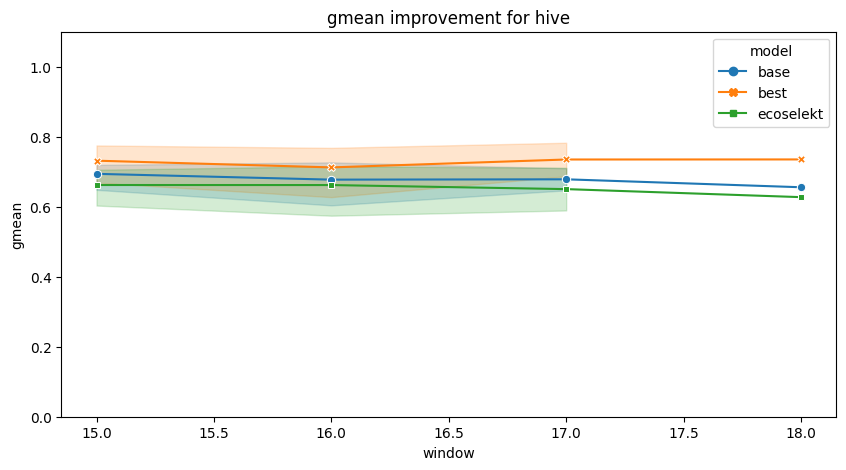

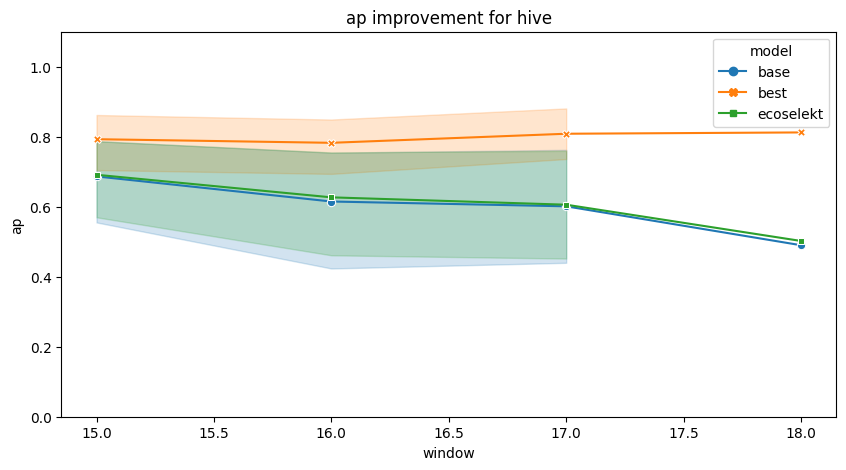

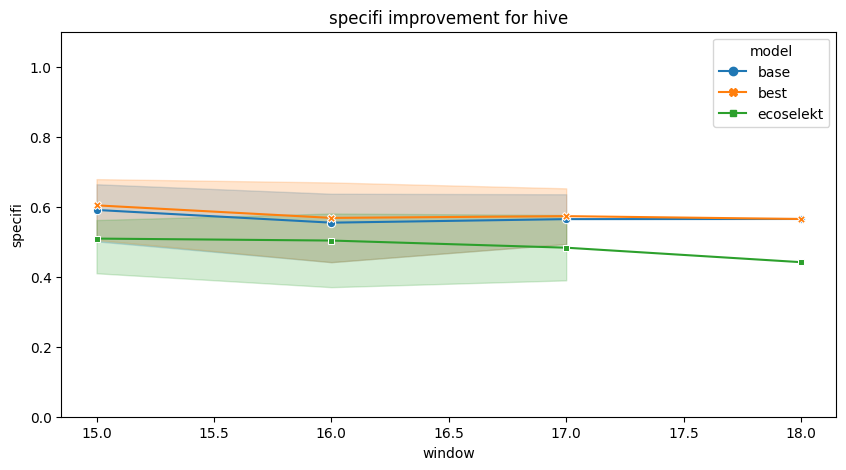

In [8]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

In [9]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["auc"], eval_df[eval_df["model"] == "base"]["auc"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.875
Wilcoxon test significance: False


In [10]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["recall"], eval_df[eval_df["model"] == "base"]["recall"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.125
Wilcoxon test significance: False


In [11]:
bestmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_model_per_test_split.csv")
bestmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(bestmodel_df.shape)
bestmodel_df.head()

(2000, 4)


,commit_id,window,test_split,model_version
0,8af753ab51f2351a2603745e879ee69c110bc583,15,16,13
1,77d7d090b0011ad9fe1e25bfb55d4e0dc56c751b,15,16,13
2,ad7652e349317b17d0dba6198d6409d09d6650bb,15,16,15
3,696affa2e66b41c1932a8e20ec780d36a7380398,15,16,15
4,b0e653aece3b8e5031fdb513655337ebdc95b6dd,15,16,15


In [12]:
selektmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selected_model_per_test_split.csv")
selektmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(selektmodel_df.shape)
selektmodel_df.head()

(21000, 4)


,commit_id,window,test_split,model_version
0,010157e9ab16601b72431ad68efb763ea11c170c,15,16,15
1,01fd68443d41a95362920c5a526d13e41b7684c8,15,16,9
2,03ee0481a518585a4a92875d88c560ff525d75d4,15,16,15
3,09b00fc863d19cf513fe1d188bb671f370f64c2d,15,16,15
4,0a5bc94c1cf65d66f793474a4818021f29e05c7e,15,16,4


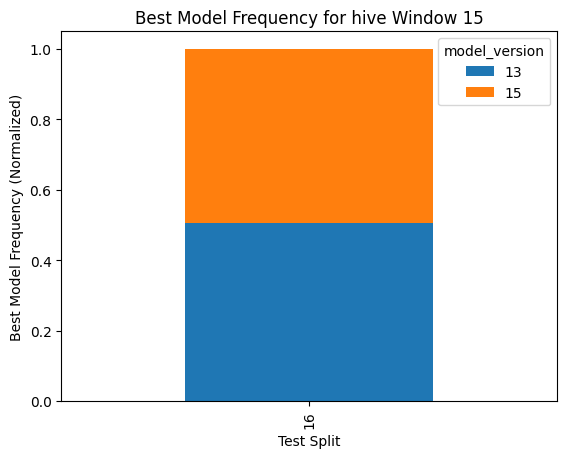

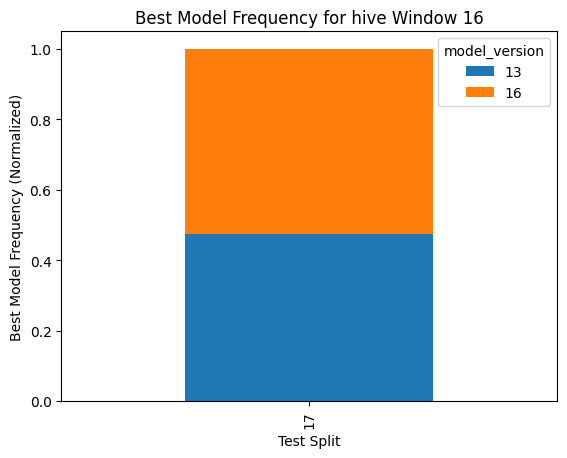

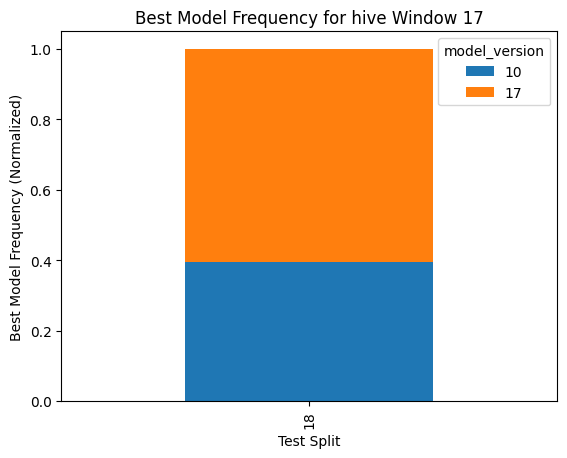

In [13]:
for i in range(MODEL_HISTORY,TOTAL_WINDOWS - 1):
    temp_bestmodel_df = bestmodel_df[bestmodel_df["window"] == i]
    temp_bestmodel_df = temp_bestmodel_df[temp_bestmodel_df["test_split"] == i + 1]

    # best model
    model_frequency_by_test_split = temp_bestmodel_df.groupby('test_split')['model_version'].value_counts().unstack().fillna(0)
    normalized_model_frequency_by_test_split = model_frequency_by_test_split.div(model_frequency_by_test_split.sum(axis=1), axis=0)
    p = normalized_model_frequency_by_test_split.plot(kind='bar', stacked=True)
    p.set_xlabel("Test Split")
    p.set_ylabel("Best Model Frequency (Normalized)")
    p.set_title(f"Best Model Frequency for {PROJECT_NAME} Window {i}")